In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [5]:
df = pd.read_excel('Comparativa.xlsx')
df.rename(columns={'Unnamed: 0': 'Dimension'}, inplace=True)
df

,Dimension,IJK,IKJ,JIK,JKI,KIJ,KJI
0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100,0.002003,0.002999,0.002004,0.001998,0.001999,0.002511
2,1000,3.208735,2.208511,2.872247,3.531835,2.239841,3.494799
3,3000,194.637489,61.430646,190.523449,247.370341,62.852575,255.162622
4,5000,579.154839,275.355969,444.907860,991.614515,287.934551,980.557769
5,10000,2665.567600,2031.040000,3862.996000,6766.112400,2036.019700,6722.316800


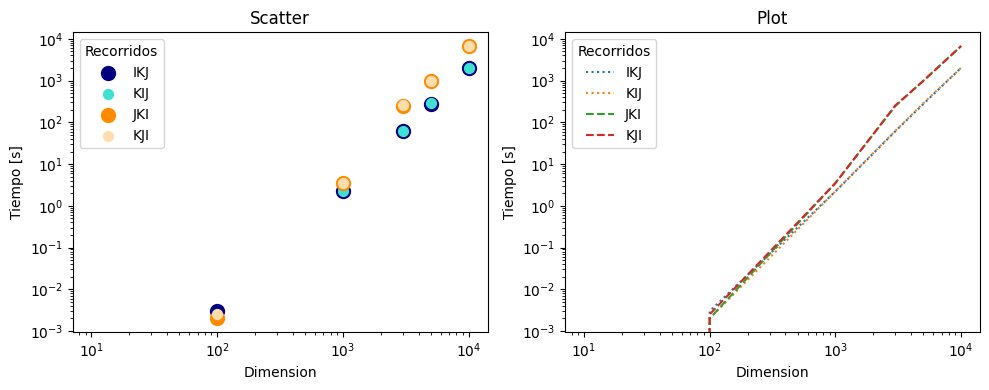

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
colors = ['navy', 'turquoise', 'darkorange', 'navajowhite']

for a,i in enumerate(['IKJ', 'KIJ', 'JKI', 'KJI']):
    if i in ['KIJ', 'KJI']:
        ax[0].scatter(x=df.Dimension.values, y=df[i].values, label=f'{i}', s=100/2, c=colors[a])
    else:
        ax[0].scatter(x=df.Dimension.values, y=df[i].values, label=f'{i}', s=100, c=colors[a])
    if a <= 1:
        ax[1].plot(df.Dimension.values, df[i].values, linestyle='dotted', label=f'{i}')
    else:
        ax[1].plot(df.Dimension.values, df[i].values, linestyle='--', label=f'{i}')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].set_title('Scatter')
ax[0].set_xlabel('Dimension')
ax[0].set_ylabel('Tiempo [s]')

ax[1].set_title('Plot')
ax[1].set_xlabel('Dimension')
ax[1].set_ylabel('Tiempo [s]')

ax[0].legend(title='Recorridos')
ax[1].legend(title='Recorridos')
plt.tight_layout()
plt.show()

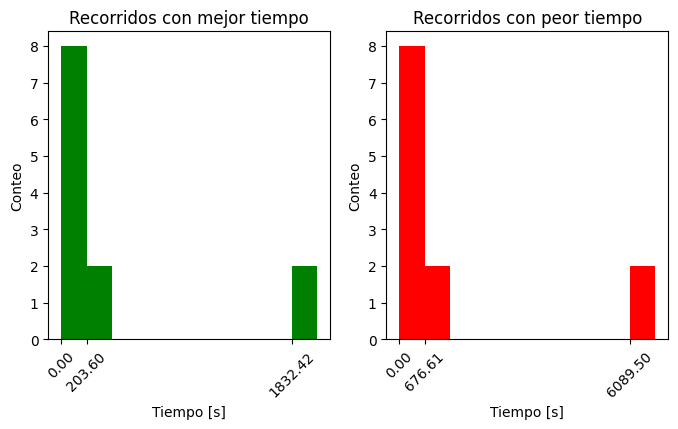

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Generación de los histogramas
hist_g = ax[0].hist(df[['IKJ', 'KIJ']].values.flatten(), color='green')
hist_b = ax[1].hist(df[['JKI', 'KJI']].values.flatten(), color='red')

# Primer histograma (Recorridos con mejor tiempo)
ax[0].set_title('Recorridos con mejor tiempo')
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Conteo')

# Mostrar solo los valores de x con frecuencia mayor que 0 en el primer histograma
ax[0].set_xticks([v for c, v in zip(hist_g[0], hist_g[1]) if c > 0])
ax[0].set_xticklabels([str(f"{v:.2f}") for c, v in zip(hist_g[0], hist_g[1]) if c > 0], rotation=45)

# Segundo histograma (Recorridos con peor tiempo)
ax[1].set_title('Recorridos con peor tiempo')
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Conteo')

# Mostrar solo los valores de x con frecuencia mayor que 0 en el segundo histograma
ax[1].set_xticks([v for c, v in zip(hist_b[0], hist_b[1]) if c > 0])
ax[1].set_xticklabels([str(f"{v:.2f}") for c, v in zip(hist_b[0], hist_b[1]) if c > 0], rotation=45)

plt.show()

In [8]:
df[['IKJ', 'KIJ']].describe().\
    loc[['mean', 'std', 'min','max']]

,IKJ,KIJ
mean,395.006354,398.174778
std,808.522464,810.059142
min,0.000000,0.000000
max,2031.040000,2036.019700


In [9]:
df[['JKI', 'KJI']].describe().loc[['mean', 'std', 'min','max']]

,JKI,KJI
mean,1334.771848,1326.922417
std,2688.311202,2670.274079
min,0.000000,0.000000
max,6766.112400,6722.316800


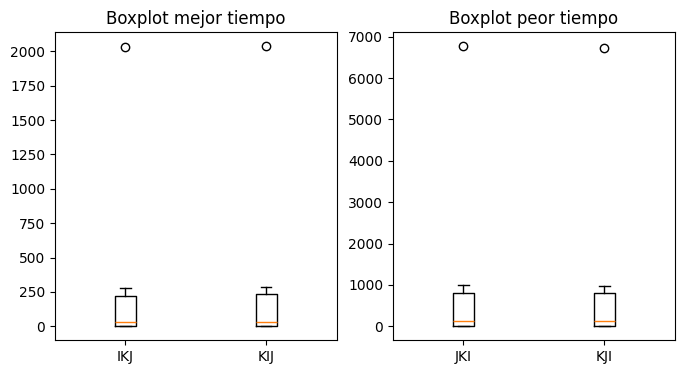

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot(df[['IKJ', 'KIJ']])
ax[1].boxplot(df[['JKI', 'KJI']])

ax[0].set_xticklabels(['IKJ', 'KIJ'])
ax[1].set_xticklabels(['JKI', 'KJI'])

ax[0].set_title('Boxplot mejor tiempo')
ax[1].set_title('Boxplot peor tiempo')

plt.show()

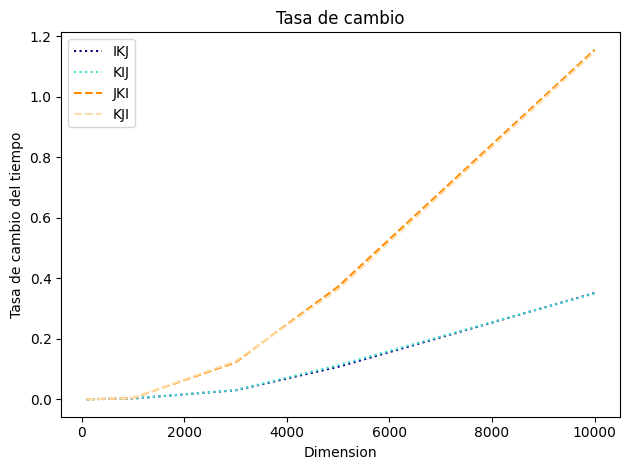

In [11]:
colors = ['navy', 'turquoise', 'darkorange', 'navajowhite']

for a,i in enumerate(['IKJ', 'KIJ', 'JKI', 'KJI']):
    tasa_cambio = np.diff(df[i]) / np.diff(df['Dimension'])
    if a <= 1:
        plt.plot(df['Dimension'].values[1:], tasa_cambio, linestyle='dotted', color=colors[a], label=f'{i}')
    else:
        plt.plot(df['Dimension'].values[1:], tasa_cambio, linestyle='--', color=colors[a], label=f'{i}')

# plt.xscale('log')
# plt.yscale('log')

plt.title('Tasa de cambio')
plt.xlabel('Dimension')
plt.ylabel('Tasa de cambio del tiempo')
plt.legend(title='Recorridos')

plt.tight_layout()
plt.legend()
plt.show()

## Mejores recorridos

In [65]:
test_desk = pd.DataFrame(columns=['i', 'j', 'k', 'fila_0', 'fila_1', 'fila_2'])
a = np.array([[i for i in range(1, 4)], [i for i in range(4, 7)], [i for i in range(7, 10)]])
b = np.array([[i for i in range(9, 6, -1)], [i for i in range(6, 3, -1)], [i for i in range(3, 0, -1)]])
c = np.zeros_like(a)

for i in range(3):
    for k in range(3):
        for j in range(3):
            test_desk.loc[len(test_desk)] = [i, k, j, c[0, :].tolist(), c[1, :].tolist(), c[2, :].tolist()]
            c[i, j] += a[i, k] * b[k,j]

test_desk.to_excel('ikj.xlsx')

In [66]:
test_desk = pd.DataFrame(columns=['i', 'j', 'k', 'fila_0', 'fila_1', 'fila_2'])
a = np.array([[i for i in range(1, 4)], [i for i in range(4, 7)], [i for i in range(7, 10)]])
b = np.array([[i for i in range(9, 6, -1)], [i for i in range(6, 3, -1)], [i for i in range(3, 0, -1)]])
c = np.zeros_like(a)

for k in range(3):
    for i in range(3):
        for j in range(3):
            test_desk.loc[len(test_desk)] = [i, k, j, c[0, :].tolist(), c[1, :].tolist(), c[2, :].tolist()]
            c[i, j] += a[i, k] * b[k,j]

test_desk.to_excel('kij.xlsx')

## Peores recorridos

In [ ]:
test_desk = pd.DataFrame(columns=['i', 'j', 'k', 'fila_0', 'fila_1', 'fila_2'])
a = np.array([[i for i in range(1, 4)], [i for i in range(4, 7)], [i for i in range(7, 10)]])
b = np.array([[i for i in range(9, 6, -1)], [i for i in range(6, 3, -1)], [i for i in range(3, 0, -1)]])
c = np.zeros_like(a)

for k in range(3):
    for j in range(3):
        for i in range(3):
            test_desk.loc[len(test_desk)] = [i, k, j, c[0, :].tolist(), c[1, :].tolist(), c[2, :].tolist()]
            c[i, j] += a[i, k] * b[k,j]

test_desk.to_excel('kji.xlsx')

In [68]:
test_desk = pd.DataFrame(columns=['i', 'j', 'k', 'fila_0', 'fila_1', 'fila_2'])
a = np.array([[i for i in range(1, 4)], [i for i in range(4, 7)], [i for i in range(7, 10)]])
b = np.array([[i for i in range(9, 6, -1)], [i for i in range(6, 3, -1)], [i for i in range(3, 0, -1)]])
c = np.zeros_like(a)

for j in range(3):
    for k in range(3):
        for i in range(3):
            test_desk.loc[len(test_desk)] = [i, k, j, c[0, :].tolist(), c[1, :].tolist(), c[2, :].tolist()]
            c[i, j] += a[i, k] * b[k,j]

test_desk.to_excel('jki.xlsx')